In [0]:
# !pip install datadotworld
# !pip install datadotworld[pandas]

In [0]:
# !dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw

In [0]:
# drive.mount("/content/drive")

In [6]:
cd 'drive/My Drive/Colab Notebooks/dw_matrix'

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/womens-shoe-prices')

In [22]:
df = data.dataframes['7003_1']
df.shape

(19045, 47)

In [23]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,websiteids,weight
11507,AVpfUZG11cnluZ0-ihDz,NaN,Roxy,"Shoes,Clothing,Women's Shoes,All Women's Shoes",Beige,NaN,2017-01-27 01:19:58,2017-01-27 01:19:58,"[{""dateSeen"":[""2017-01-27T01:19:58Z""],""sourceU...",NaN,8.887010e+11,"[{""key"":""Material"",""value"":[""Synthetic""]},{""ke...",NaN,https://i5.walmartimages.com/asr/e9b1e9aa-dbfd...,NaN,"0888701068891,888701068891,roxy/arjl100255",Roxy,ARJL100255,"[{""dateSeen"":[""2017-01-27T01:19:58Z""],""name"":""...",Roxy Riviera Women Open Toe Synthetic Tan Fli...,14.98,14.98,NaN,NaN,new,NaN,USD,2017-01-27T01:19:58Z,2017-01-24T00:00:00Z,NaT,FALSE,ApparelSave - Walmart.com,REDUCED,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Roxy-Riviera-Open-T...,NaN,NaN,NaN,"10,9",NaN,https://www.walmart.com/ip/Roxy-Riviera-Open-T...,8.88701E+11,NaN,NaN
12701,AVpfPtxqilAPnD_xYBAn,NaN,TOTES ISOTONER,"Clothing,Shoes,Women's Shoes,All Women's Shoes",NaN,NaN,2016-02-21 16:55:19,2016-02-21 16:55:19,NaN,NaN,2.265304e+10,"[{""key"":""Shipping Weight (in pounds)"",""value"":...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-2776/...,NaN,"226,530,425,650,022,000,000,000",NaN,NaN,"[{""dateSeen"":[""2016-02-21T16:55:19Z""],""name"":""...",Totes Isotoner Size Small Womens Terry Classic...,22,22,NaN,NaN,new,NaN,USD,2016-02-21T16:55:19Z,2016-02-14T00:00:00Z,NaT,FALSE,BeltOutlet - Walmart.com,REDUCEDUSD 7.05,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/totes-ISOTONER-Small...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/totes-ISOTONER-Small...,22653042565,NaN,0.52 lbs
4756,AVpe_3ai1cnluZ0-boTX,NaN,Michael Kors,"Clothing, Shoes & Accessories,Women's Shoes,Boots",Black,NaN,2016-03-04 02:35:29,2016-03-04 02:35:29,NaN,NaN,7.403490e+11,"[{""key"":""Style"",""value"":[""Fashion - Knee-High""...",NaN,http://i.ebayimg.com/images/g/IycAAOSwvUlWshVZ...,NaN,"740349274389,0740349274389,michaelkorsfultonri...",NaN,NaN,"[{""dateSeen"":[""2016-02-26T00:00:00Z""],""name"":""...",Michael Kors Fulton Riding Tall Boot Black Lea...,180,180,NaN,NaN,New with box,NaN,USD,2016-03-04T02:35:29Z,2016-02-26T00:00:00Z,NaT,FALSE,NaN,NaN,NaN,USD 14.50,NaN,NaN,http://www.ebay.com/itm/Michael-Kors-FULTON-Ri...,NaN,NaN,NaN,11,"[{""sourceURLs"":[""http://www.ebay.com/itm/Micha...",http://www.ebay.com/itm/Michael-Kors-FULTON-Ri...,7.40349E+11,NaN,NaN
3762,AVpfAKeCilAPnD_xSx4z,NaN,Caparros,"Shoes,Women's Shoes,Clothing,All Women's Shoes",Silver,NaN,2017-01-23 05:29:34,2017-01-23 05:29:34,"[{""dateSeen"":[""2017-01-23T05:29:34Z""],""sourceU...",NaN,6.564870e+11,"[{""key"":""Material"",""value"":[""Synthetic""]},{""ke...",NaN,https://i5.walmartimages.com/asr/e2251dfb-abb7...,NaN,"caparros/s8301lhtslvspk,656487297053,065648729...",Caparros,S8301-LHTSLVSPK,"[{""dateSeen"":[""2017-01-23T05:29:34Z""],""name"":""...",Caparros Tango Open Toe Synthetic Wedge Heel,35.99,35.99,NaN,NaN,new,NaN,USD,2017-01-23T05:29:34Z,2017-01-21T00:00:00Z,NaT,FALSE,ApparelSave - Walmart.com,REDUCED,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Caparros-Tango-Open...,NaN,NaN,NaN,"5.5,10,7,5,6.5,7.5,8",NaN,https://www.walmart.com/ip/Caparros-Tango-Open...,6.56487E+11,NaN,NaN
589,AVpfEwXZLJeJML4310Lo,NaN,Morris Costumes,"Adult Halloween Costumes,Clothing, Shoes & Acc...",Blue,NaN,2016-11-07 00:44:47,2016-11-07 00:44:47,"[{""dateSeen"":[""2016-11-07T00:44:46Z""],""sourceU...",NaN,7.147180e+11,"[{""key"":""Purpose"",""value"":[""Halloween Costume""...",NaN,http://i.ebayimg.com/images/g/0ccAAOSwlfxXGtan...,NaN,"0714718484396,brandnewcinderellafancydressoutf...",Morris Costumes,UADP85

In [24]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'websiteids', 'weight'],
      dtype='object')

In [26]:
df.prices_currency.unique()

array(['USD', 'CAD', 'AUD', 'EUR', nan, 'GBP',
       'Off Price Direct - Walmart.com', 'new'], dtype=object)

In [28]:
df.prices_currency.value_counts(normalize=True)

USD                               0.956031
CAD                               0.033515
AUD                               0.006199
EUR                               0.003362
GBP                               0.000788
Off Price Direct - Walmart.com    0.000053
new                               0.000053
Name: prices_currency, dtype: float64

In [29]:
df_usd = df[df.prices_currency == 'USD'].copy()
df_usd.shape

(18199, 47)

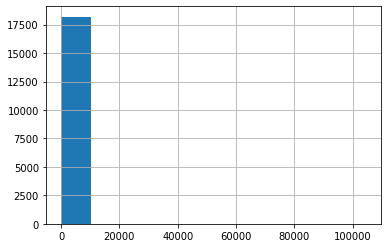

In [30]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()


In [33]:
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
filter_max

1100.0

In [0]:
df_usd_filter = df_usd[df_usd['prices_amountmin'] < filter_max]

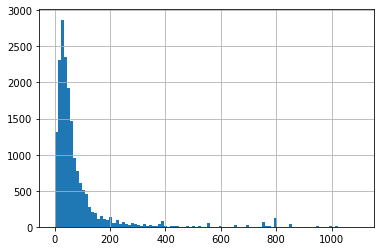

In [37]:
df_usd_filter.prices_amountmin.hist(bins=100)

In [0]:
!git add matrix_one/day3.ipynb

In [63]:
!git commit -m "Read Women's Shoe Prices dataset from data.world"

[master 0335bb1] Read Women's Shoe Prices dataset from data.world
 1 file changed, 1 insertion(+)
 create mode 100644 matrix_one/day3.ipynb


In [64]:
!git push -u origin master

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 15.79 KiB | 3.95 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/bsekiewicz/dw_matrix.git
   7f0eb71..0335bb1  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
